## 1.Problem Statement

### 1.1.Project Overview

Customer churn is a major challenge in SyriaTel Communications Company. Acquiring new customers as such is quite expensive than retaining the existing ones.Telecom companies collect large volumes of customer data such as customer usage, customers on different plans minutes used on calls etc.

This SyriaTe dataset provides an opportunity to apply machine learning techniques to identify customers who are likely to discontinue their services with SyriaTel, and for SyriaTel to intify them early and mitigate them from churning.

### 1.2. Objective definition.

- The project aims to build binary classifer to predict whether a customer will 'soon' churn(leave) an stop doing business with Syria Tel. The target variable is churn.

- To train and compare classification models as such Logistic Regression and Decision Tree Classifier in terms of catching churn early

- To evaluate model performance using appropriate churn focused metrics such as:
     - Recall(to detect churners)
     - Precision
     - F1-score
     - ROC - AUC
- To provide data-driven recommendations for customers retention strategies.

- The overall goal is to identfify the risk early and minimize revenue loss from churn since acquiring new customers is expensive compared to retaining the ones the company aalready has.

### 1.3 Stakeholders
The department that will mainly benefit from this information will be:
- management, 
- marketing team 
- customer care support team.

### 1.4 Data Understanding

The dataset used for this project comes from SyriaTel. It has various customer information such as international plan, area code, and customer service details. For the target column(churn), the columns shows us whether the customer churned or did not churn.

The data also has a mix of different data types such as numerical and categorical variables.
On usage, we have data such as:
- total night calls
- total evening calls etc.

For plan, believing that SyriaTel is a telecom company, we also have data on:
- international plan
- voicemail plan.

## 2.0 Data Loading

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

In [65]:
# Loading the dataframe.
df= pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


2.1. Data Inspection

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [67]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


- The data has 3,333 rows and 21 columns in total. The data has 16 numeric columns and 4 categorical columns

- The data also has no missing values as all the columns are filled.

## 3.Data Understanding(EDA)

At this section, we focus to understand the patterns and churn behaviour for SyriaTel customers.

3.1 Churn on Class Distribution

In [68]:
df['churn'] = df['churn'].replace ({'yes':1, 'no':0,True:1,False:0})
df['churn'] = df['churn'].astype(int)

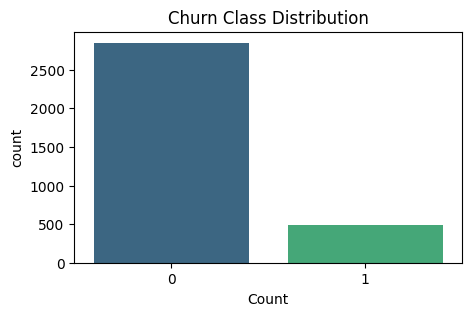

churn
0    85.51
1    14.49
Name: proportion, dtype: float64


In [69]:
# Undertandint the Target distribution
plt.figure(figsize=(5,3))
sns.countplot(x= 'churn', data=df,palette ='viridis')
plt.title('Churn Class Distribution')
plt.xlabel('Count')
plt.show()

print(df['churn'].value_counts(normalize=True).round(4)*100)

The percentage of customers who churn are 14.49% while those who do not churn are 85.51%. This data is quite unproportional as the classe have an imbalance.

3.2 Churn Distribution by interantional plan and voice mail plan

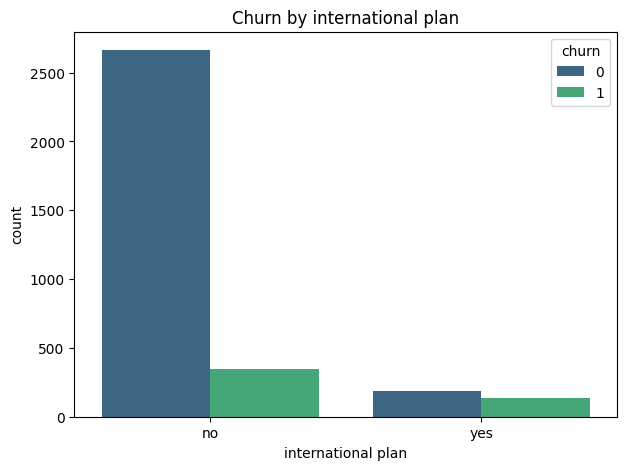

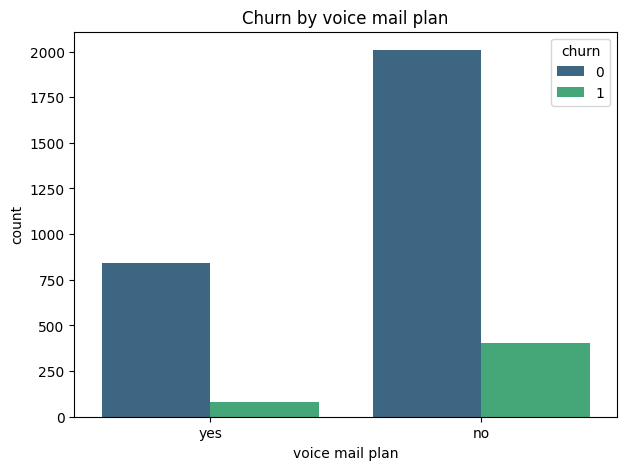

In [70]:
categorical_columns = ['international plan','voice mail plan']

for cols in categorical_columns:
    plt.figure(figsize=(7,5))
    sns.countplot(x=cols, hue='churn', data=df,palette='viridis')
    plt.title(f"Churn by {cols}")
    plt.show()

- Most customers with with no international plan did not churn. Only a smaller group did churn.

- For customers with internation plan, which is small proportion of the customers, the once who churned are noticeably higher than those who did not.


3.3 Churn Distribution-Strongest Predictors

In [71]:
num_cols_to_check= [
    'number vmail messages',
    'total day minutes',
    'total day calls',
    'total eve minutes',
    'total eve calls',
    'total night minutes',
    'total night calls',
    'total intl minutes',
    'total intl calls',
    'customer service calls'
]

for col in num_cols_to_check:
    df[f'{col}_bin'] = pd.qcut(df[col],q=5,duplicates='drop')


    print(f"\nChurn rate (%) by binned{col}:")
    print(
        df.groupby(f'{col}_bin', observed=True)['churn']
        .mean()
        .sort_values(ascending=False)
        .round(2) *100
    )


Churn rate (%) by binnednumber vmail messages:
number vmail messages_bin
(-0.001, 25.0]    15.0
(25.0, 51.0]      11.0
Name: churn, dtype: float64

Churn rate (%) by binnedtotal day minutes:
total day minutes_bin
(224.76, 350.8]     34.0
(-0.001, 134.74]    13.0
(134.74, 165.68]    10.0
(165.68, 194.0]      8.0
(194.0, 224.76]      7.0
Name: churn, dtype: float64

Churn rate (%) by binnedtotal day calls:
total day calls_bin
(117.0, 165.0]    18.0
(-0.001, 84.0]    14.0
(96.0, 106.0]     14.0
(106.0, 117.0]    14.0
(84.0, 96.0]      13.0
Name: churn, dtype: float64

Churn rate (%) by binnedtotal eve minutes:
total eve minutes_bin
(244.4, 363.7]      21.0
(213.44, 244.4]     15.0
(158.94, 188.0]     14.0
(188.0, 213.44]     13.0
(-0.001, 158.94]    10.0
Name: churn, dtype: float64

Churn rate (%) by binnedtotal eve calls:
total eve calls_bin
(105.0, 117.0]    15.0
(117.0, 170.0]    15.0
(84.0, 95.0]      14.0
(95.0, 105.0]     14.0
(-0.001, 84.0]    14.0
Name: churn, dtype: float64

Chu

Number vmail messages
- From the output, customers with 0-25 voicemail messages have 15% churn.
- Customers with 26-51 voicemail messages have a 11% churn rate.

Total day minutes
- Customers with very high daytime usage(>224.76) have a 34% churn- which is higher than others. This is one group in SyriaTel data that needs to be watched out.

3.4 Correlation heatmap

The correlation heatmap will help us decide which features to keep/remove to also avoid collinearity.

In [72]:
# correlation heatmap (before)
numeric_columns_before = ['number vmail messages',
'total day minutes', 'total day calls','total eve minutes', 'total day charge',
'total eve calls','total night minutes', 'total night calls','total eve charge',
'total intl minutes', 'total intl calls','customer service calls','total night charge',
'total intl charge']

<Axes: >

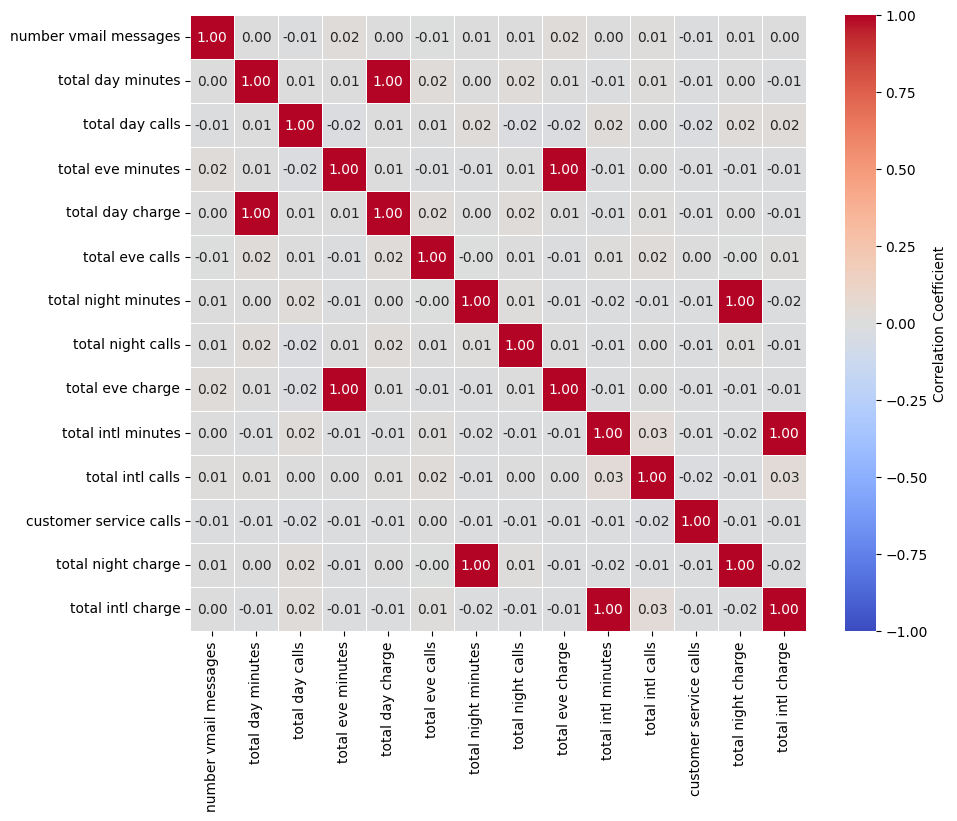

In [73]:
numeric_df = df[numeric_columns_before]

#calculating correlation matrix
corr_matrix_before = numeric_df.corr()

plt.figure(figsize=(10,8))   # to adjust size

sns.heatmap(
    corr_matrix_before,
    annot=True,
    fmt='.2f',
    cmap= 'coolwarm',
    vmin=-1,vmax=1,
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={'label': 'Correlation Coefficient'}
)

From the heatmap, we can see the correlation and also instances of multicollinearity. For example, total evening charge and total evening minutes are highly correlated. We also see that total night minutes and total night charge have a high multicllinearity. Therefore, this instances where thre is multicollinearity for example, some columns such as total international charge, total dat charge, total evening charge were removed before the data is trained and tested.

In [74]:
useless_columns = ["phone number","state","account length" "area code","total day charge","total eve charge","total night charge","total intl charge"]
df = df.drop(columns=useless_columns,errors='ignore')

In [75]:
# Identifying the numerical and categorical columns
numeric_columns_after= ['number vmail messages', 
'total day minutes', 'total day calls','total eve minutes', 'total eve calls','total night minutes', 'total night calls','total intl minutes', 'total intl calls','customer service calls']

categorical_columns = ['international plan','voice mail plan']

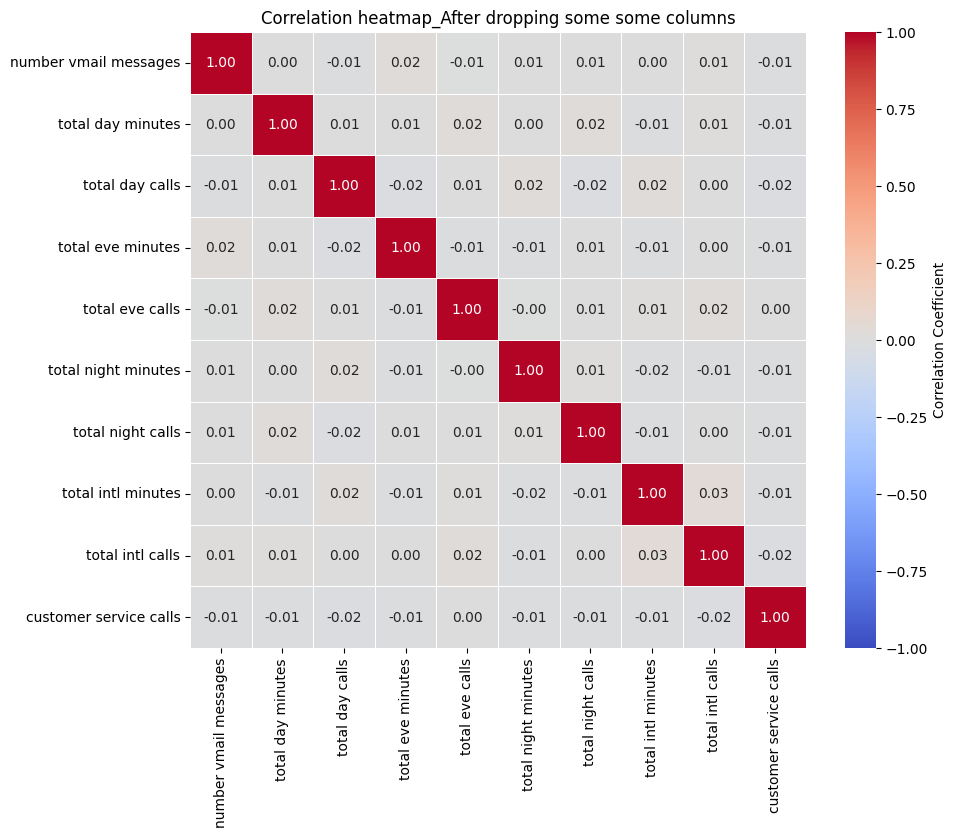

In [76]:
# Creating a correlation heatmap-after dropping the columns the model will not use.
numeric_df = df[numeric_columns_after]

#calculating correlation matrix
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,8))   # to adjust size

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap= 'coolwarm',
    vmin=-1,vmax=1,
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Correlation heatmap_After dropping some some columns')
plt.show()

- From the heat map, the columns , there are columns with very strong correlation.  For example, total day minutes, total evening minutes, total night minute, and total international minutes.

- To also avoid multicollinarity, we will drop one column fro each pair to reduce multicllinearity.

- The columns to be dropped will be,total day charge, total evening charge, total night charge, and total international charge
- The heatmap after dropping some columns has not reduced the multicollinearity that was there before.
- Although dropping the columns might not do alot for the model since the columns were mainly redudant.

## Data Preparation

Before proceeding to modelling, the data will be prepared to ensure that the model generalizes well to data that it has not seen.

Preparation will include:

- Separating the targt variable churn from the features(predictors)

- Removing columns which do not provide any predictive value to the model

- Splitting the data into train set and test set to prevent data leaking

- Encoding categorical variables using onehot encoding
- Standardizing/normalizing numeric feautures

### Separating Target & Predictors

In [77]:
# Separating target and predictors

#Target
y = df["churn"].copy()

#Features
X = df.drop(columns="churn")


Splitting the data into train and test

In [78]:
# Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.3)

In [79]:
print("X_train Shape:", X_train.shape)

X_train Shape: (2333, 24)


In [80]:
print("X_test Shape:", X_test.shape)

X_test Shape: (1000, 24)


Column Transformer(for scaling numeric features and encoding categoricals)

In [81]:
# Creating preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers = [
        ("num",StandardScaler(),numeric_columns_after),
        ("cat",OneHotEncoder(drop='first',handle_unknown='ignore'),categorical_columns)
    
    ])

In [82]:
X_train_processed = preprocessor.fit_transform(X_train)

In [83]:
X_test_processed = preprocessor.transform(X_test)

## Model Building & Comparison.

For model, the project will use Logistic Regression and Decision Tree. Logistic regression expores how independent variables affect one independent variable. Logistic Regression is used for Binary classification where the output can be one of the two possible. Decision Tree

Baseline Model : Logistic Regression

In [84]:
# Logistic Regression

#Create the first Instance of Logistic Regression
logreg = LogisticRegression(
    max_iter =1000,
    random_state=42
)

# fit the model
logreg.fit(X_train_processed,y_train)

# Evaluating the model
y_pred_logreg = logreg.predict(X_test_processed)

- In this step, we will get the actual performance numbers for each score(recall, f1 score, accuracy and precision)

In [85]:
recall_logreg = recall_score(y_test,y_pred_logreg)     # catches as many churners as possible
precision_logreg = precision_score(y_test,y_pred_logreg) # 
f1_score_logreg = f1_score(y_test,y_pred_logreg)         # checks the overall balance
accuracy_logreg = accuracy_score(y_test,y_pred_logreg)    # 

recall_logreg, precision_logreg,f1_score_logreg,accuracy_logreg

(0.21678321678321677, 0.5740740740740741, 0.3147208121827411, 0.865)

In [86]:
# Printing the classificiation report
print(classification_report(y_test,y_pred_logreg))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred_logreg))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       857
           1       0.57      0.22      0.31       143

    accuracy                           0.86      1000
   macro avg       0.73      0.59      0.62      1000
weighted avg       0.84      0.86      0.84      1000


Confusion Matrix:
[[834  23]
 [112  31]]


We now have our performamce score and  classification report for our firt model.

- For our Churn=1, all the performance metrics scores are low. The precision is 57%, a bit moderate.

- Recall is only 22% meaning that our model misses to catch 78% of the churnes(customers who will eventally leave SyriaTel)

- F1-score is also abit low.

- Accuracy is 86.5% however the data has class Imbalance.

ROC AUC for Logistic Regression:0.8300


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

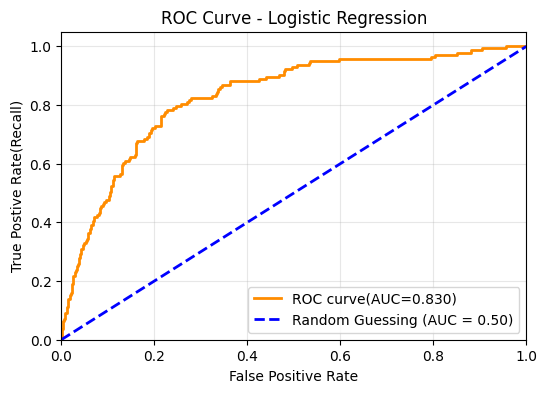

In [87]:
# getiing class predictions(0/1)
y_pred_logreg = logreg.predict(X_test_processed)

# prob of churn probabillites for ROC
y_pred_proba = logreg.predict_proba(X_test_processed)[:, 1]

# computing AUC score
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)

#computing ROC curve
auc = roc_auc_score(y_test,y_pred_proba)
print(f"ROC AUC for Logistic Regression:{auc:.4f}")

# plotting the ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=2,
         label = f'ROC curve(AUC={auc:.3f})')

plt.plot([0,1],[0,1], color='blue',lw=2,linestyle='--',
         label='Random Guessing (AUC = 0.50)')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate(Recall)')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc ="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout


6.2.Tuned Logistic Regression

In [88]:
# Tuned Logistic Regression

#Create the first Instance of Logistic Regression
logreg_tuned = LogisticRegression(
    class_weight="balanced",
    max_iter =1000,
    random_state=42
)

# fit the model
logreg_tuned.fit(X_train_processed,y_train)

# Evaluating the model
y_pred_logreg_tuned = logreg_tuned.predict(X_test_processed)

In [89]:
recall_logreg_tuned = recall_score(y_test,y_pred_logreg_tuned)
precision_logreg_tuned = precision_score(y_test,y_pred_logreg_tuned)
f1_score_logreg_tuned= f1_score(y_test,y_pred_logreg_tuned)
accuracy_logreg_tuned= accuracy_score(y_test,y_pred_logreg_tuned)

recall_logreg_tuned, precision_logreg_tuned,f1_score_logreg_tuned,accuracy_logreg_tuned

(0.8041958041958042, 0.3709677419354839, 0.5077262693156733, 0.777)

In [90]:
# Printing the classificiation report
print(classification_report(y_test,y_pred_logreg_tuned))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred_logreg_tuned))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86       857
           1       0.37      0.80      0.51       143

    accuracy                           0.78      1000
   macro avg       0.67      0.79      0.68      1000
weighted avg       0.88      0.78      0.81      1000


Confusion Matrix:
[[662 195]
 [ 28 115]]


ROC AUC for Tuned Logistic Regression:0.8353


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

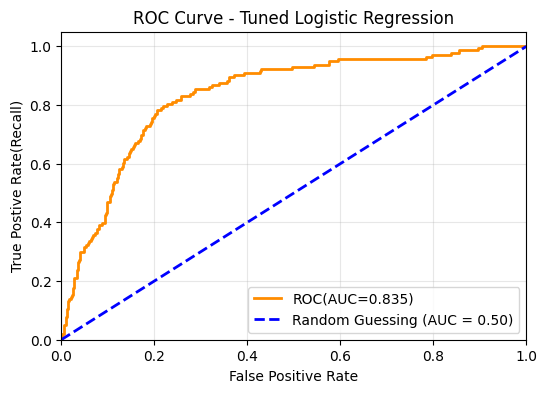

In [91]:
# ROC CURVE FOR THE TUNED LOGISTIC REGRESSION
# Computing ROC curve for the tuned losistic regression
y_pred_logreg_tuned = logreg_tuned.predict(X_test_processed)

# prob of churn probabillites for ROC
y_proba_tuned = logreg_tuned.predict_proba(X_test_processed)[:, 1]

# computing AUC score
fpr, tpr, thresholds = roc_curve(y_test,y_proba_tuned)

#computing ROC curve
auc_logreg_tuned = roc_auc_score(y_test,y_proba_tuned)
print(f"ROC AUC for Tuned Logistic Regression:{auc_logreg_tuned:.4f}")

# plotting the ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=2,
         label = f'ROC(AUC={auc_logreg_tuned:.3f})')

plt.plot([0,1],[0,1], color='blue',lw=2,linestyle='--',
         label='Random Guessing (AUC = 0.50)')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate(Recall)')
plt.title('ROC Curve - Tuned Logistic Regression')
plt.legend(loc ="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout


Logistic Coefficients

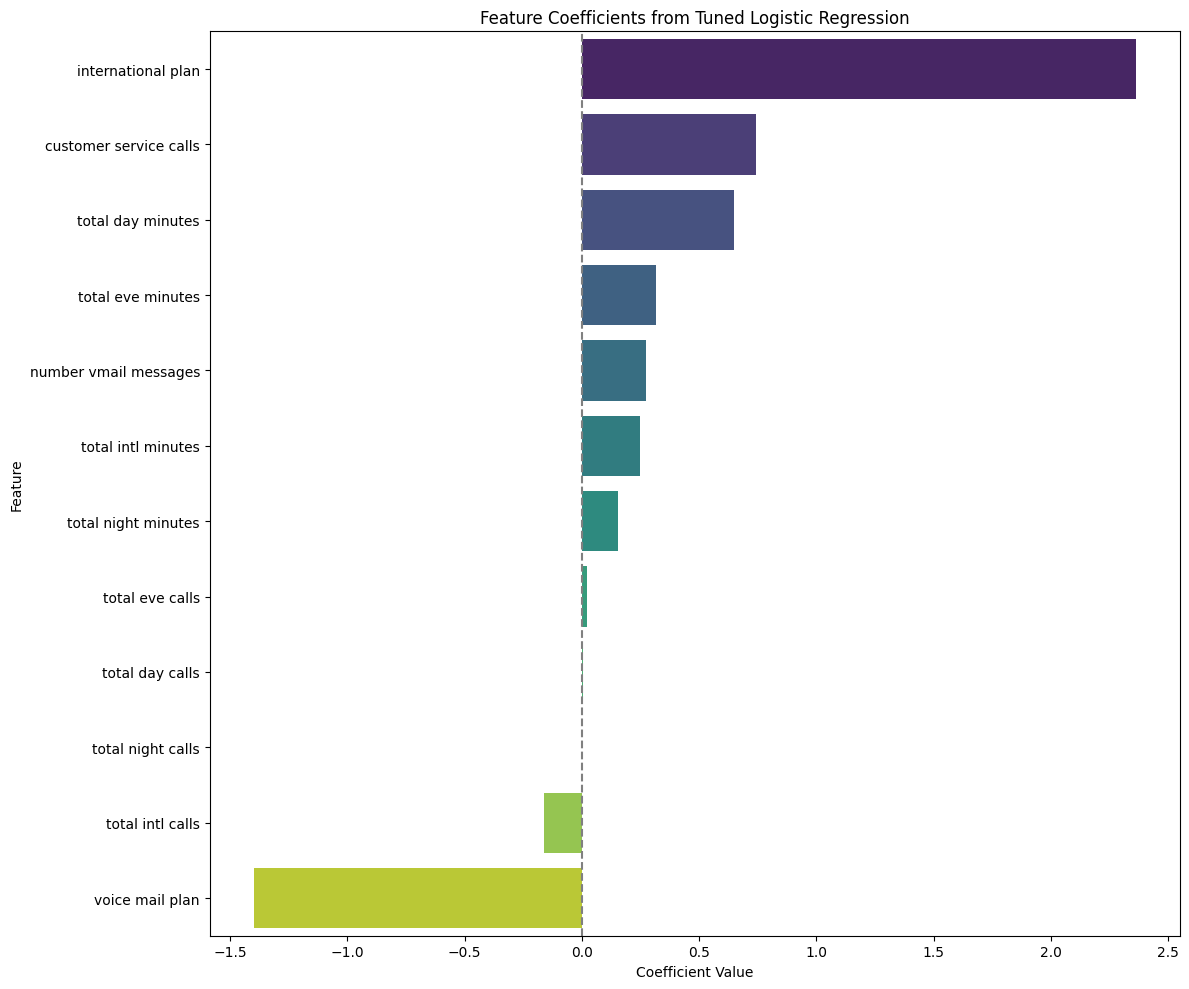

In [92]:
feature_names = numeric_columns_after + categorical_columns

coefficients = pd.Series(
    logreg_tuned.coef_[0],
    index= feature_names
).sort_values(ascending=False)

# Plot as usual
plt.figure(figsize=(12,10))
sns.barplot(x=coefficients.values, y=coefficients.index, palette='viridis')
plt.title('Feature Coefficients from Tuned Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='grey', linestyle='--')
plt.tight_layout()
plt.show()

The above graph indicators the strongest drivers of churn.
For example, international plan- these are customers who are more likely to churn.  For this segment of client, pricing and proper customer support can curb their churning. Additionally,they can be given discounted offers and better call rates.

Customer service calls- This are also customers who are at an increasedrisk of churning.  Poor customer service often turn customers away. Therefore, by SyriaTel investing in tbetter customer care,faster resolution mechanisms and proactive outreach can reduce this segment of clients from churning.

Also additional value added sevices to some segments such as voicemail can boost retention from this clients. 

### Confusion Matric for Tuned Decision tree.

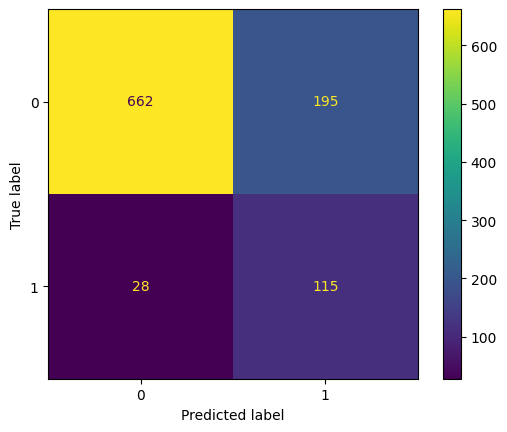

True Negatives:662,False Positives:195
False Negatives:28,True Positives:115


In [93]:
cm = confusion_matrix(y_test,y_pred_logreg_tuned)
cm_labels = ['No Churn', 'Churn']

display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

# TP,FN,TN,FP counts
tn,fp,fn,tp =cm.ravel()
print(f"True Negatives:{tn},False Positives:{fp}")
print(f"False Negatives:{fn},True Positives:{tp}")


For the tuned logistic regression the outputs are as follows:
- TP- model predicted 115 clients who churned and they actually churned.
- FP- model predicted 195 customers churned when they actually did not churn
- FN- model predicted 28 customers did not churn when they actually did churn(very alarming)
- TN- model predicted 662 who did not churn and they actually did not churn

6.3: Decision Tree Classifier

In [94]:
dt = DecisionTreeClassifier(
    random_state=42)
dt.fit(X_train_processed,y_train)

# predictions
y_pred_dt = dt.predict(X_test_processed)

In [95]:
# Evaluating our dt model
recall_dt = recall_score(y_test,y_pred_dt)
precision_dt = precision_score(y_test,y_pred_dt)
f1_score_dt= f1_score(y_test,y_pred_dt)
accuracy_dt= accuracy_score(y_test,y_pred_dt)

recall_dt, precision_dt,f1_score_dt,accuracy_dt

(0.7132867132867133, 0.7083333333333334, 0.710801393728223, 0.917)

In [96]:
# Printing the classificiation report
print(classification_report(y_test,y_pred_dt))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       857
           1       0.71      0.71      0.71       143

    accuracy                           0.92      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.92      0.92      0.92      1000


Confusion Matrix:
[[815  42]
 [ 41 102]]


ROC AUC for Decision Tree:0.8321


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

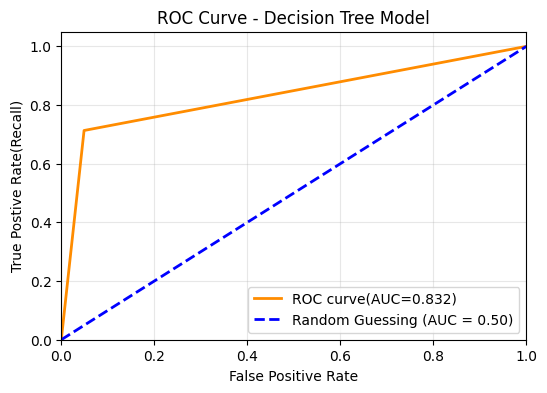

In [97]:
# Computing ROC curve for Decision Tree
y_pred_dt = dt.predict(X_test_processed)

y_proba_dt = dt.predict_proba(X_test_processed)[:,1]

fpr, tpr, thresholds = roc_curve(y_test,y_proba_dt)

# plotting the ROC curve
auc_dt = roc_auc_score(y_test,y_proba_dt)
print(f"ROC AUC for Decision Tree:{auc_dt:.4f}")

# plotting the ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=2,
         label = f'ROC curve(AUC={auc_dt:.3f})')

plt.plot([0,1],[0,1], color='blue',lw=2,linestyle='--',
         label='Random Guessing (AUC = 0.50)')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate(Recall)')
plt.title('ROC Curve - Decision Tree Model')
plt.legend(loc ="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout

Tuned Decision Tree

In [98]:
dt_tuned = DecisionTreeClassifier(
    criterion= 'gini',
    max_depth=5,        
    min_samples_split = 20,
    min_samples_leaf = 10,
    random_state=42,
    class_weight = 'balanced',
    ccp_alpha = 0.001

)

dt_tuned.fit(X_train_processed, y_train)

y_pred_dt_tuned = dt_tuned.predict(X_test_processed)

In [99]:
# Evaluating the tuned Decision Tree Model
recall_dt_tuned = recall_score(y_test,y_pred_dt_tuned)
precision_dt_tuned = precision_score(y_test,y_pred_dt_tuned)
f1_score_dt_tuned= f1_score(y_test,y_pred_dt_tuned)
accuracy_dt_tuned= accuracy_score(y_test,y_pred_dt_tuned)

recall_dt_tuned, precision_dt_tuned,f1_score_dt_tuned,accuracy_dt_tuned

(0.7972027972027972, 0.7755102040816326, 0.7862068965517242, 0.938)

In [100]:
# Printing the classificiation report
print(classification_report(y_test,y_pred_dt_tuned))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred_dt_tuned))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       857
           1       0.78      0.80      0.79       143

    accuracy                           0.94      1000
   macro avg       0.87      0.88      0.87      1000
weighted avg       0.94      0.94      0.94      1000


Confusion Matrix:
[[824  33]
 [ 29 114]]


ROC AUC for Decision Tree:0.8876


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

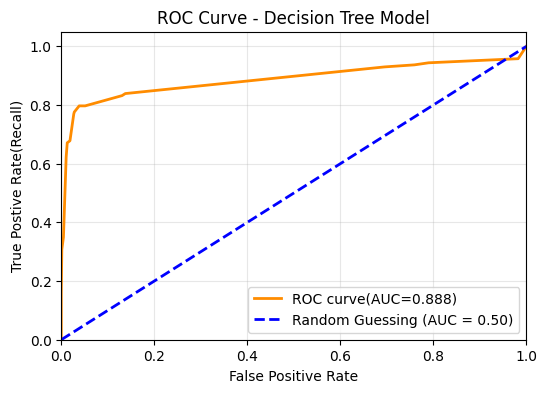

In [101]:
# Computing ROC curve for tuned Decsion Tree
y_pred_dt_tuned = dt_tuned.predict(X_test_processed)

y_prob_dt_tuned = dt_tuned.predict_proba(X_test_processed)[:,1]

fpr, tpr, thresholds = roc_curve(y_test,y_prob_dt_tuned)

# plotting the ROC curve
auc_dt_tuned = roc_auc_score(y_test,y_prob_dt_tuned)
print(f"ROC AUC for Decision Tree:{auc_dt_tuned:.4f}")

# plotting the ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=2,
         label = f'ROC curve(AUC={auc_dt_tuned:.3f})')

plt.plot([0,1],[0,1], color='blue',lw=2,linestyle='--',
         label='Random Guessing (AUC = 0.50)')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate(Recall)')
plt.title('ROC Curve - Decision Tree Model')
plt.legend(loc ="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout

## Model Evaluation

Summary Comparison Table

In [102]:
model_results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Tuned Logistic Regression",
        "Decision Tree",
        "Tuned Decision Tree"
    ],
    "Recall": [
        recall_logreg,
        recall_logreg_tuned,
        recall_dt,
        recall_dt_tuned
    ],
    "Precision": [
        precision_logreg,
        precision_logreg_tuned,
        precision_dt,
        precision_dt_tuned
    ],
      "F1 Score": [
        f1_score_logreg,
        f1_score_logreg_tuned,
        f1_score_dt,
        f1_score_dt_tuned
    ],
     "Accuracy": [
        accuracy_logreg,
        accuracy_logreg_tuned,
        accuracy_dt,
        accuracy_dt_tuned
     ],
     "ROC AUC": [
        auc,
        auc_logreg_tuned,
        auc_dt,
        auc_dt_tuned
     ]
})

model_results

,Model,Recall,Precision,F1 Score,Accuracy,ROC AUC
0,Logistic Regression,0.216783,0.574074,0.314721,0.865,0.830005
1,Tuned Logistic Regression,0.804196,0.370968,0.507726,0.777,0.835277
2,Decision Tree,0.713287,0.708333,0.710801,0.917,0.832139
3,Tuned Decision Tree,0.797203,0.775510,0.786207,0.938,0.887602


Combined Multi Model ROC Curve

ROC AUC for Decision Tree:0.8876


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

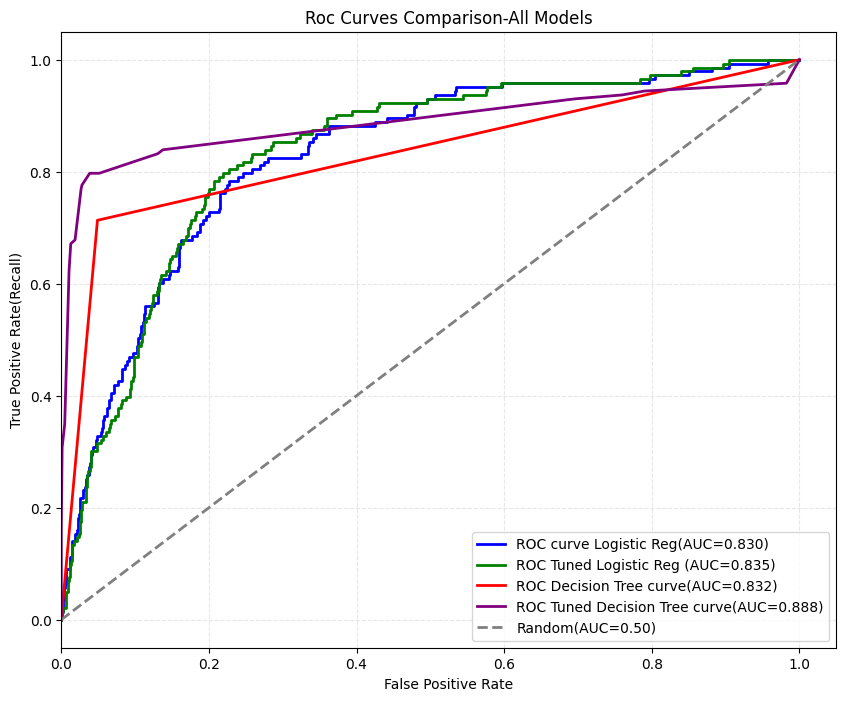

In [103]:
plt.figure(figsize=(10,8))

# 1.Baseline Logistic Regression
fpr, tpr, _ = roc_curve(y_test,y_pred_proba)
auc = roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr, color='blue',lw=2,
         label = f'ROC curve Logistic Reg(AUC={auc:.3f})')

# 2.Tuned Logistic Regression
fpr, tpr, _ = roc_curve(y_test,y_proba_tuned)
auc_logreg_tuned = roc_auc_score(y_test,y_proba_tuned)
plt.plot(fpr,tpr, color='green',lw=2,
         label = f'ROC Tuned Logistic Reg (AUC={auc_logreg_tuned:.3f})')

# Decision Tree
fpr, tpr, _ = roc_curve(y_test,y_proba_dt)
auc_dt = roc_auc_score(y_test,y_proba_dt)
plt.plot(fpr,tpr, color='red',lw=2,
         label = f'ROC Decision Tree curve(AUC={auc_dt:.3f})')


# Tuned Decision Tree
fpr, tpr, _= roc_curve(y_test,y_prob_dt_tuned)
auc_dt_tuned = roc_auc_score(y_test,y_prob_dt_tuned)
print(f"ROC AUC for Decision Tree:{auc_dt_tuned:.4f}")
plt.plot(fpr,tpr, color='purple',lw=2,
         label = f'ROC Tuned Decision Tree curve(AUC={auc_dt_tuned:.3f})')

# Random guessing line
plt.plot([0,1],[0,1],color='gray', lw=2,linestyle='--',label='Random(AUC=0.50)')


# Formatting
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate(Recall)')
plt.title('Roc Curves Comparison-All Models')
plt.legend(loc="lower right",fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout


Confusion Matrix for Best Model

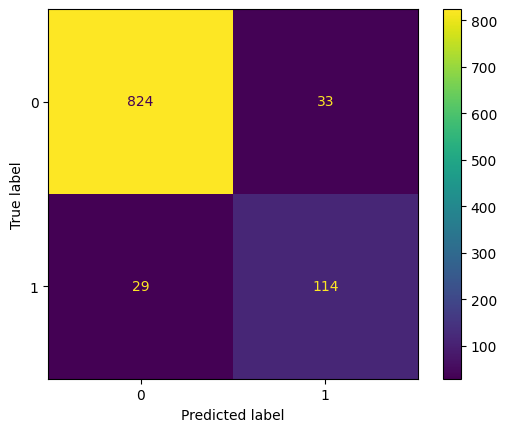

True Negatives:824,False Positives:33
False Negatives:29,True Positives:114


In [104]:
# Confusion Matrix for our best and final model(Tuned Decision Model)
cm = confusion_matrix(y_test, y_pred_dt_tuned)
cm_labels = ['No Churn', 'Churn']

display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

# TP,FN,TN,FP counts
tn,fp,fn,tp =cm.ravel()
print(f"True Negatives:{tn},False Positives:{fp}")
print(f"False Negatives:{fn},True Positives:{tp}")


TP- Means that the model predicted the customers churned and they actually churned.
TN - Means that the model predicted the customers did not churn when they actually did not churn.
FN- means that the model predicted that the customer did not churn when they infact did churn.
FP - Means tha the model predicted the custmer churned when they actually did not churn.

For the tuned decision tree the outputs are as follows:
- TP- model predicted 114 clients who churned and they actually churned.
- FP- model predicted 33 customers churned when they actually did not churn
- FN- model predicted 29 customers did not churn when they actually did churn(very alarming)
- TN- model predicted 824 who did not churn and they actually did not churn

## 7.Interpration and Model Selection

From our models, Tuned Decision Tree model is the BEST overall model. The Tuned Decision Tree achieves all highest scores in all metrics. 

It has a strong recall of 81.1% and highest ROC AUC of 0.867. showing its classification power of its ability to distinguish between churn and no-churn.This outperforms the tuned logistic regression AUC of 83.5% and recall of 80.4%, indicating superior ability to prioritize high-risk customers for retention interventions. This indicated that the model is highly effective at correctly identifying churners.

## Recommendations


 For example, international plan- these are customers who are more likely to churn.  For this segment of client, pricing and proper ustomer support can curb their churning. Additionally,they can be given discounted offers and better call rates.

 Customer service calls- This are also customers who are at an increasedrisk of churning.  Poor customer service often turn customers away. Therefore, by SyriaTel investing in tbetter customer care, assigning priority to the internation plan clients, faster resolution mechanisms and proactive outreach can reduce this segment of clients from churning.

 Also additional value added sevices to some segments such as voicemail can boost retention from this clients.From our datasets, SyriaTell should focus on the portion of clients who are falling in the false negative bit. Clients who the model has predicted that they are not churning when they are infact about to churn, or have churned.

For the day clients, the following strategies can be used in order to reduce them from churning. The following can be done:
- discounting the bundles during daytime
- Personalized retention such as offering free bundles or call for a duration at at a time. If they buy minutes during the day for calling, they get extra minutes and some bundles.
- Also, since the day customers are the high usage of the products are service, SyriaTel could award them through targeted loyalty programs.


END!!